In [1]:
import matplotlib.pyplot as plt
import numpy as np
import matplotlib.font_manager
from matplotlib import rcParams
from matplotlib import pyplot as plt
from matplotlib.patches import Patch # to create custom legend
from matplotlib.lines import Line2D  # to create custom legend
from matplotlib.patches import Rectangle
from matplotlib.patches import FancyBboxPatch
import networkx as nx
from adjustText import adjust_text
from brokenaxes import brokenaxes
from matplotlib.gridspec import GridSpec


In [7]:
### SETTING SOME FIGURE DESIGN PARAMETERS
# Fonts & Labels
rcParams['axes.labelsize'] = 14
rcParams['xtick.labelsize'] = 12
rcParams['ytick.labelsize'] = 12
rcParams['legend.fontsize'] = 9

plt.rc('font', family='serif', serif='Times')
rcParams['font.family'] = 'serif'
rcParams['font.serif'] = ['Times']

# Size of the figure
width = 22             #5.5 inches ios roughly the width of the useable space on a vertical A4 space
height = width / 2     # dividing by 1.618 results in the golden ratio

In [8]:
### Assigning data
# x-axis values - land dispossessions
# Order: Baseline (BL) [0], Strong institutions (SI) [1], Weak institutions (WI) [2], Pioneer dominant (PD) [3], Laggard dominant (LD) [4], Early Intervention (EI) [5], Late intervention (LI) [6]

UA_LD = (1326.37, 1139.21, 1310.18, 1227.6, 1423.02)
CC_LD = (2995.73, 3261.26, 2307.01, 2853.07, 3018.3, 2945.05, 3359.49)
SC_LD = (726.15, 665.4, 790.77, 400.36, 1060.72, 673.15, 843.94)
MS_LD = (422.97, 271.58, 570.21, 300.1, 558.64, 369.37, 642.17)

# y-axis values - deforestation
UA_DF = (13118.77, 12041.23, 13308.48, 13014.28, 13183.98)
CC_DF = (10543.88, 9104.5, 11770.05, 10071.19, 10670.66, 10496.6, 10438.36)
SC_DF = (12472.97, 11751.83, 12777.73, 11418.08, 12844.24, 12398, 12615.78)
MS_DF = (11512.95, 11502.47, 11656.45, 11135.86, 11595.44, 11448.36, 12030.8)

# Transactions symbols
Transaction = ('-', 'o', 'o', '-', 'o', '++', '++', '+', '++', '++', '++', '+', '--', 'o', '-', '--', '-', '--', '-', 'o', 'o', '-', '-', 'o', 'o', 'o')

# define names
UA_names = ['BL - ', 'SI = ', 'WI = ', 'PD - ', 'LD = ']
CC_names = ['BL ++', 'SI ++', 'WI + ', 'PD ++', 'LD ++', 'HC ++', 'LC + ']
SC_names = ['BL --', 'SI = ', 'WI - ','PD --','LD - ', 'HC --', 'LC - ']
MS_names = ['BL = ', 'SI = ', 'WI - ','PD - ', 'LD = ', 'HC = ', 'LC = ']

# Baseline values
Baseline_LD = (1326.37)
Baseline_DF = (13118.77)

# Average values
Average_LD = (1363.92)
Average_DF = (11727.81)

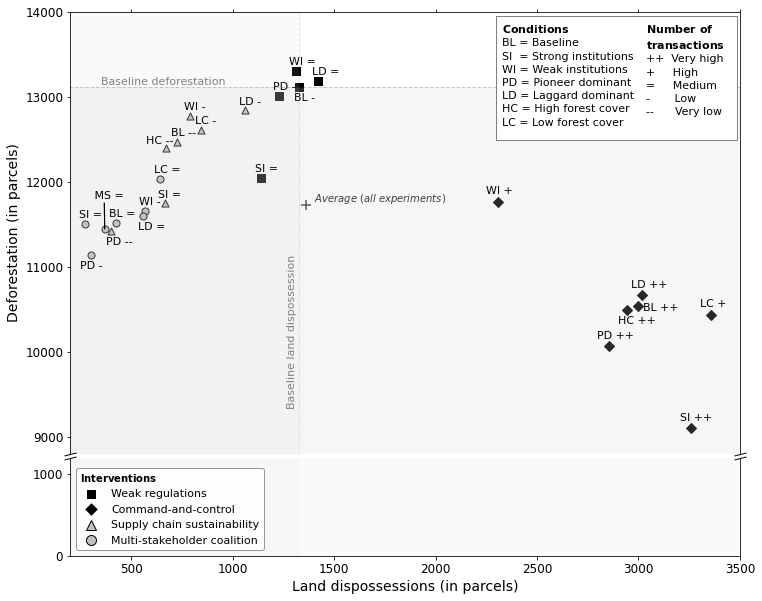

In [31]:
# creating the plot
#Setting up the figure using GridSpec, GridSpec allows to adjust the height-ratios between the two figures, so they don't take up an equal amount of space of the figure
fig = plt.figure(figsize=(12,10)) # ,tight_layout=True
gs = GridSpec(2, 2, height_ratios=[9, 2], hspace=0.015)
ax1 = fig.add_subplot(gs.new_subplotspec((0, 0), colspan=2))
ax2 = fig.add_subplot(gs.new_subplotspec((1, 0), colspan=2))

# setting axes limits
ax1.set_xlim(200,3500)
ax1.set_ylim(8800,14000)
ax1.set_ylabel("Deforestation (in parcels)")

ax2.set_xlim(200,3500)
ax2.set_ylim(0,1200)
ax2.set_yticks([0,1000])
ax2.set_xlabel ("Land dispossessions (in parcels)")       

# hide the spines between ax and ax2
ax1.spines.bottom.set_visible(False)
ax2.spines.top.set_visible(False)
ax1.xaxis.tick_top()
ax1.tick_params(labeltop=False)  # don't put tick labels at the top
ax2.xaxis.tick_bottom()


# Creating the background fill
#for upper plot
ax1.axvspan(0, Baseline_LD, alpha=0.1, facecolor='lightgrey', edgecolor='black', linestyle='--')
ax1.axhspan(0, Baseline_DF, alpha=0.1, facecolor='lightgrey', edgecolor='black', linestyle='--')
ax1.axhspan(0, Baseline_DF, alpha=0.1, facecolor='lightgrey', edgecolor='black', linestyle='--')
#for lower plot
ax2.axvspan(0, Baseline_LD, alpha=0.1, facecolor='lightgrey', edgecolor='black', linestyle='') #adding this to both axes,
ax2.axhspan(0, Baseline_DF, alpha=0.1, facecolor='lightgrey', edgecolor='black', linestyle='')

# plotting the experiments, grouped by intervention
ax1.scatter(UA_LD, UA_DF, marker='s', facecolor = 'black', s=50)
ax1.scatter(CC_LD, CC_DF, marker='D', facecolor = 'black', s=50)
ax1.scatter(SC_LD, SC_DF, marker='^', facecolor = 'silver', edgecolor='black', s=50)
ax1.scatter(MS_LD, MS_DF, marker='o', facecolor = 'silver', edgecolor='black', s=50)

ax1.scatter(Average_LD, Average_DF, marker='+', facecolor = 'black', edgecolor = None, s=100, alpha=0.75)
ax1.annotate('$\it{Average\ (all\  experiments)}$', xy=(Average_LD, Average_DF), xytext=(Average_LD+35, Average_DF+35), color='black', alpha=0.75)

texts=[]

### Iterating through the data-sets to annotate all datapoints
for i,j,k in zip(UA_LD, UA_DF, UA_names):
    if i == UA_LD[0]:
        continue
    ax1.annotate(str(k), xy=(i-31, j+75), fontsize=11)
    
for i,j,k in zip(CC_LD, CC_DF, CC_names):
    if i == CC_LD[0]:
        continue
    if i == CC_LD[5]:
        continue
    ax1.annotate(str(k), xy=(i-56, j+85), fontsize=11)
    
for i,j,k in zip(SC_LD, SC_DF, SC_names):
    if i == SC_LD[3]:
        continue
    if i == SC_LD[5]:
        continue
    ax1.annotate(str(k), xy=(i-31, j+65), fontsize=11)
    
for i,j,k in zip(MS_LD, MS_DF, MS_names):
    if i == MS_LD[3]:
        continue
    if i == MS_LD[4]:
        continue
    if i == MS_LD[5]:
        continue
    ax1.annotate(str(k), xy=(i-31, j+75), fontsize=11)

# Manually annotating markers that would otherwise overlap (with the automatic allocation)
ax1.annotate('PD --', xy=(SC_LD[3], SC_DF[3]), xytext=(SC_LD[3]-25, SC_DF[3]-160), fontsize=11)
ax1.annotate('PD - ', xy=(MS_LD[3], MS_DF[3]), xytext=(MS_LD[3]-50, MS_DF[3]-160), fontsize=11)
ax1.annotate('HC --', xy=(SC_LD[5], SC_DF[5]), xytext=(SC_LD[5]-100, SC_DF[5]+55), fontsize=11)  
ax1.annotate('HC ++', xy=(CC_LD[5]-45, CC_DF[5]-170), fontsize=11)
ax1.annotate('BL ++', xy=(CC_LD[0]+25, CC_DF[0]-60), fontsize=11)
ax1.annotate('   MS =', xy=(MS_LD[5], MS_DF[5]), xytext=(MS_LD[5]-100, MS_DF[5]+350), arrowprops=dict(facecolor='grey', headwidth=0, width=0.2, shrink=0), fontsize=11)  
ax1.annotate('LD = ', xy=(MS_LD[4]-25, MS_DF[4]-160), fontsize=11)
ax1.annotate('BL - ', xy=(UA_LD[0]-25, UA_DF[0]-165), fontsize=11)

d = .25  # proportion of vertical to horizontal extent of the slanted line
kwargs = dict(marker=[(-1, -d), (1, d)], markersize=12,
              linestyle="none", color='k', mec='k', mew=1, clip_on=False)
ax1.plot([0, 1], [0, 0], transform=ax1.transAxes, **kwargs)
ax2.plot([0, 1], [1, 1], transform=ax2.transAxes, **kwargs)

# Adding descriptors for the baseline and averages values
ax1.annotate('Baseline deforestation', xy=(350, Baseline_DF+25), color='grey', alpha=1, fontsize=11)
ax1.annotate('Baseline land dispossession', xy=(Baseline_LD-60, 9350), color='grey', alpha=1, rotation=90, fontsize=11)


### Creating the legend
# manually setting the legend elements, matching the markers from the scatterplot
legend_elements = [
    Line2D([0], [0], marker='s', color='w', label='Weak regulations',markerfacecolor='black', markersize=10),
    Line2D([0], [0], marker='D', color='w', label='Command-and-control', markerfacecolor='black', markersize=10),
    Line2D([0], [0], marker='^', color='w', label='Supply chain sustainability', markerfacecolor='silver', markeredgecolor='black', markersize=10),
    Line2D([0], [0], marker='o', color='w', label='Multi-stakeholder coalition', markerfacecolor='silver', markeredgecolor='black', markersize=10)
]

# Creating the legend, and left-aligning the legend title 
leg = ax2.legend(handles=legend_elements, title='$\\bf{Interventions}$', loc='lower left', fontsize=11, edgecolor='grey', facecolor='white') #, ncol=2
leg._legend_box.align = 'left'

# Creating two 'fake' legend entries (as text boxes), for the conditions and transactions
props = dict(boxstyle='round', facecolor='white', edgecolor='grey', alpha=0)
legendtext = '$\\bf{Number\ of}$\n$\\bf{transactions}$\n++  Very high\n+     High\n=     Medium\n-       Low\n--      Very low'
legendtext2 = '$\\bf{Conditions}$\nBL = Baseline\nSI  = Strong institutions\nWI = Weak institutions\nPD = Pioneer dominant\nLD = Laggard dominant\nHC = High forest cover\nLC = Low forest cover'

# Placing the two text boxes (i.e., fake legends) in upper right corner, these will act as two columns of the second legend
ax1.text(0.86, 0.975, legendtext, transform=ax1.transAxes, fontsize=11, verticalalignment='top', bbox=props, linespacing=1.4)
ax1.text(0.645, 0.975, legendtext2, transform=ax1.transAxes, fontsize=11, verticalalignment='top', bbox=props, linespacing=1.4)

# Creating a box around the fake legend to make it look like a single legend box
rect = matplotlib.patches.Rectangle((2300, 12500), 1184, 1450, linewidth=1, edgecolor='grey', facecolor='white', joinstyle='round' )
ax1.add_patch(rect)

#Save it
# plt.savefig('filepath.png', facecolor='white', dpi=600)

In [5]:
# plt.savefig('C:/Users/mariu/OneDrive - Stanford/PhD_Stanford/Research/3_Modelling Jurisdictional Approaches/2_Manuscript_and_figures/Python_figures/Experiments_scatter-plot.png', facecolor='white', alpha=1, dpi=600)

C:\Users\mariu\AppData\Local\Temp/ipykernel_4156/4020922744.py:1: MatplotlibDeprecationWarning: savefig() got unexpected keyword argument "alpha" which is no longer supported as of 3.3 and will become an error two minor releases later
  plt.savefig('C:/Users/mariu/OneDrive - Stanford/PhD_Stanford/Research/3_Modelling Jurisdictional Approaches/2_Manuscript_and_figures/Python_figures/Experiments_scatter-plot.png', facecolor='white', alpha=1, dpi=600)


<Figure size 432x288 with 0 Axes>